In [ ]:
import pandas as pd 
import numpy as np 
from IPython.display import Audio
import pickle
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import torch.nn as nn
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader ,Subset
import torch.nn as nn
import torch.optim as optim
from scipy.signal import spectrogram
from sklearn.model_selection import KFold
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
with open('padded_data_labels.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

padded_data = loaded_data['Padded_Data']
labels = loaded_data['Labels']
file_names = loaded_data['File_Name']

print("Pickle dosyasından veri başarıyla yüklendi.")


Pickle dosyasından veri başarıyla yüklendi.


In [17]:
hepsi_df=pd.DataFrame(loaded_data)

In [18]:
data = np.stack(hepsi_df["Padded_Data"].to_numpy())
labels = hepsi_df["Labels"].to_numpy()

def extract_features(audio_data, sample_rate=22050, n_mfcc=40):
    features = []
    for signal in audio_data:

        mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc)
        mfcc_mean = np.mean(mfcc, axis=1)
        feature_vector = np.hstack([
            mfcc_mean])
        features.append(feature_vector)
    
    return np.array(features)

features = extract_features(data, sample_rate=22050)
print(f"Feature shape: {features.shape}")

Feature shape: (2068, 40)


Fold 1/5


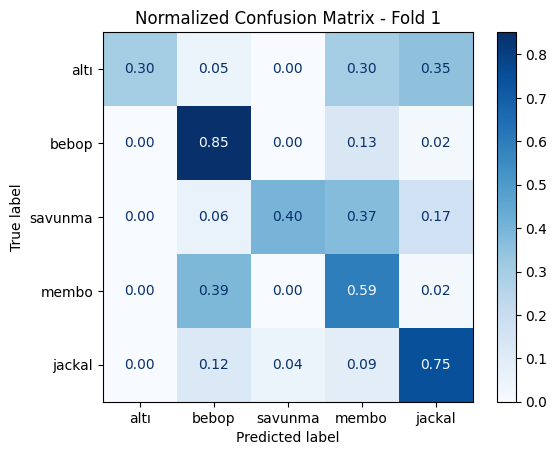

Fold 1 Classification Report:
              precision    recall  f1-score   support

        altı       1.00      0.30      0.46        20
       bebop       0.62      0.85      0.72       101
     savunma       0.82      0.40      0.54        35
       membo       0.63      0.59      0.61       108
      jackal       0.75      0.75      0.75        67

    accuracy                           0.66       331
   macro avg       0.76      0.58      0.61       331
weighted avg       0.69      0.66      0.65       331

Fold 1 Accuracy: 66.47%
Fold 2/5


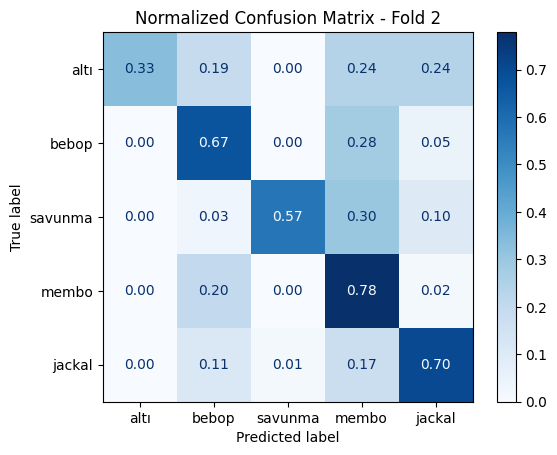

Fold 2 Classification Report:
              precision    recall  f1-score   support

        altı       1.00      0.33      0.50        21
       bebop       0.64      0.67      0.66        97
     savunma       0.94      0.57      0.71        30
       membo       0.62      0.78      0.69       113
      jackal       0.77      0.70      0.73        70

    accuracy                           0.68       331
   macro avg       0.80      0.61      0.66       331
weighted avg       0.71      0.68      0.68       331

Fold 2 Accuracy: 68.28%
Fold 3/5


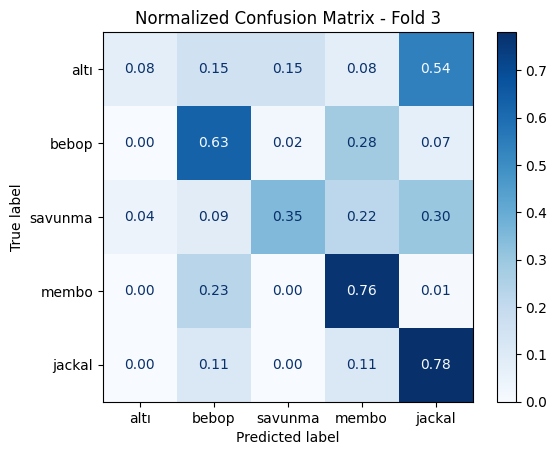

Fold 3 Classification Report:
              precision    recall  f1-score   support

        altı       0.50      0.08      0.13        13
       bebop       0.63      0.63      0.63       103
     savunma       0.67      0.35      0.46        23
       membo       0.66      0.76      0.71       110
      jackal       0.74      0.78      0.76        82

    accuracy                           0.67       331
   macro avg       0.64      0.52      0.54       331
weighted avg       0.66      0.67      0.66       331

Fold 3 Accuracy: 67.07%
Fold 4/5


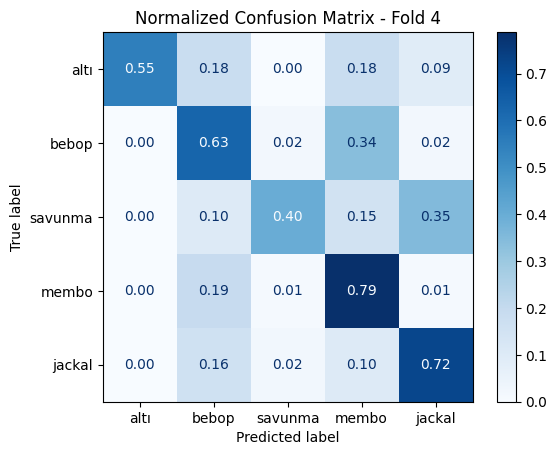

Fold 4 Classification Report:
              precision    recall  f1-score   support

        altı       1.00      0.55      0.71        11
       bebop       0.64      0.63      0.63       107
     savunma       0.62      0.40      0.48        20
       membo       0.62      0.79      0.69       104
      jackal       0.85      0.72      0.78        89

    accuracy                           0.69       331
   macro avg       0.75      0.62      0.66       331
weighted avg       0.70      0.69      0.69       331

Fold 4 Accuracy: 68.58%
Fold 5/5


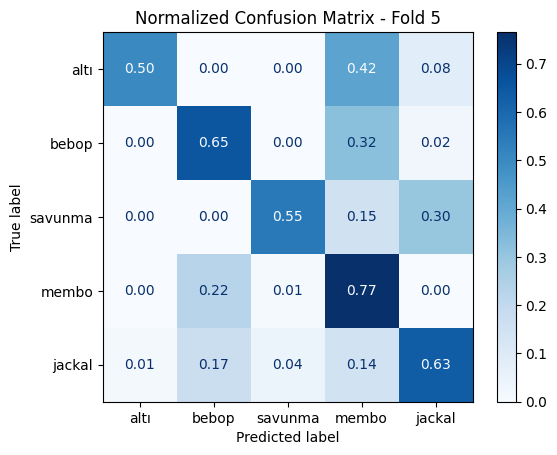

Fold 5 Classification Report:
              precision    recall  f1-score   support

        altı       0.86      0.50      0.63        12
       bebop       0.70      0.65      0.68       124
     savunma       0.73      0.55      0.63        20
       membo       0.56      0.77      0.65        98
      jackal       0.83      0.63      0.72        76

    accuracy                           0.67       330
   macro avg       0.74      0.62      0.66       330
weighted avg       0.69      0.67      0.67       330

Fold 5 Accuracy: 66.97%


NameError: name 'test_loader' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Subset
from torch.utils.data.dataset import Dataset
from sklearn.model_selection import KFold, train_test_split


class AudioDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


class AudioClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(AudioClassifier, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

        dummy_input = torch.zeros(1, 1, input_size)
        conv_out = self.forward_conv(dummy_input)
        self.flattened_size = conv_out.shape[1] * conv_out.shape[2]

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward_conv(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        return x

    def forward(self, x):
        x = self.forward_conv(x)
        x = x.view(x.size(0), -1)   
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


data = hepsi_df["Padded_Data"].to_list()
labels = hepsi_df["Labels"].to_list()
label_names = ["altı", "bebop", "savunma", "membo", "jackal"]
train_val_data, test_data, train_val_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

train_val_dataset = AudioDataset(train_val_data, train_val_labels)
test_dataset = AudioDataset(test_data, test_labels)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

k_folds = 5
num_epochs = 80
batch_size = 32
input_size = len(data[0])
num_classes = len(set(labels))


kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_results = []
all_fold_metrics = []  

for fold, (train_idx, val_idx) in enumerate(kf.split(train_val_dataset)):
    print(f"Fold {fold + 1}/{k_folds}")
    
    
    train_subset = Subset(train_val_dataset, train_idx)
    val_subset = Subset(train_val_dataset, val_idx)
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    
    model = AudioClassifier(input_size, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            inputs = inputs.unsqueeze(1)  
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    

    model.eval()
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            inputs = inputs.unsqueeze(1) 
            
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(targets.cpu().numpy())
    
   
    conf_matrix = confusion_matrix(val_labels, val_preds, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
    disp.plot(cmap=plt.cm.Blues, values_format='.2f')
    plt.title(f"Normalized Confusion Matrix - Fold {fold + 1}")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    
    
    report = classification_report(val_labels, val_preds, target_names=label_names, output_dict=True)
    print(f"Fold {fold + 1} Classification Report:")
    print(classification_report(val_labels, val_preds, target_names=label_names))
    all_fold_metrics.append(report)
   
    accuracy = np.mean(np.array(val_preds) == np.array(val_labels))
    print(f"Fold {fold + 1} Accuracy: {accuracy * 100:.2f}%")
    fold_results.append(accuracy)


test_preds = []
test_labels = []
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.unsqueeze(1)  # Kanal boyutunu ekle
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(targets.cpu().numpy())

# Test Seti için Normalize Edilmiş Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_preds, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title("Normalized Confusion Matrix - Test Set")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Test Doğruluğu
test_accuracy = np.mean(np.array(test_preds) == np.array(test_labels))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Cross-Validation Ortalama Doğruluğu
average_accuracy = np.mean(fold_results)
print(f"Average Cross-Validation Accuracy: {average_accuracy * 100:.2f}%")

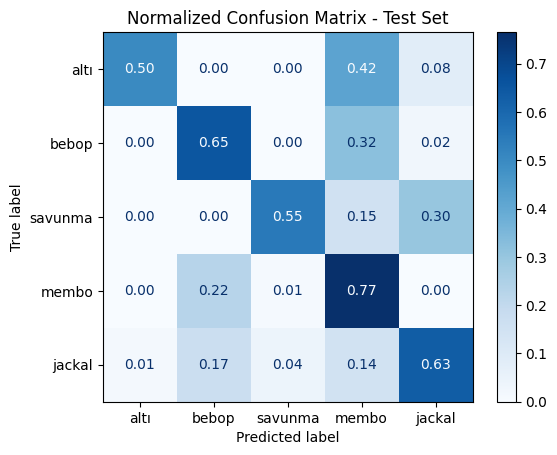

Test Accuracy: 66.97%
Average Cross-Validation Accuracy: 67.47%


In [33]:

test_preds = []
test_labels = []
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.unsqueeze(1)  # Kanal boyutunu ekle
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(targets.cpu().numpy())

# Test Seti için Normalize Edilmiş Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_preds, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title("Normalized Confusion Matrix - Test Set")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Test Doğruluğu
test_accuracy = np.mean(np.array(test_preds) == np.array(test_labels))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Cross-Validation Ortalama Doğruluğu
average_accuracy = np.mean(fold_results)
print(f"Average Cross-Validation Accuracy: {average_accuracy * 100:.2f}%")